In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
def load_energies():
    num_dis = 1000
    energies_dict = {}
    fn = "data/full_3/dmrg_energies.txt"
    with open(fn, 'r') as f:
        for line in f:
            data = line.split()
            W, seed, E_min, E_max = float(data[0]), int(data[1]), float(data[2]), float(data[3])
            if W not in energies_dict.keys():
                energies_dict[W] = [None]*num_dis
            energies_dict[W][seed] = [E_min, E_max]
    return energies_dict              

def load_file(W, e, energies_dict):
    fn = "data/full_3/full_overlap_info_{:05.4f}_L_32_l_3_e_{:03.2f}.txt".format(W, e)
    num_dis = 1000
    L = 32
    overlap_data = np.zeros((L, num_dis))
    energy_data = np.zeros((num_dis, 2))
    with open(fn, 'r') as f:
        for line in f:
            data = line.split()
            seed, E1, E2, site, ovlp = int(data[0]), float(data[1]), float(data[2]), int(data[3]), float(data[4])
            E_min, E_max = energies_dict[W][seed]
            delta_E = E_max - E_min
            ep1, ep2 = (E1 - E_min)/delta_E, (E2 - E_min)/delta_E
            
            overlap_data[site][seed] = ovlp
            energy_data[seed] = [ep1, ep2]
            
    return overlap_data, energy_data

def filter_data(overlap_data, energy_data, e, tol=0.05):
    L, num_dis = overlap_data.shape
    new_ovlp = [[] for site in range(L)]
    new_engy = []
    for seed in range(num_dis):
        ep1, ep2 = energy_data[seed]
        if np.abs(ep1 - e) < tol:
            for site in range(L):
                new_ovlp[site].append(overlap_data[site][seed])
            new_engy.append([ep1, ep2])
    return np.array(new_ovlp), np.array(new_engy)

def compute_avg_overlap(overlap_data):
    data = []
    L, num_dis = overlap_data.shape
    for site in range(L):
        data.append(np.mean(np.log10(overlap_data[site])))
    return data



<IPython.core.display.Javascript object>


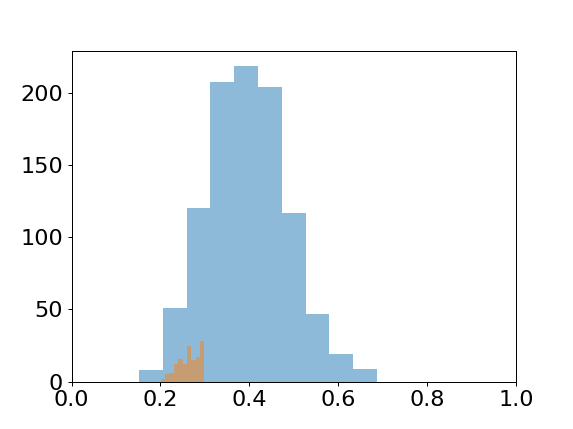

In [38]:
%matplotlib notebook
energies_dict = load_energies()
overlap_data, energy_data = load_file(0.0001, 0.25, energies_dict)
new_ovlp, new_engy = filter_data(overlap_data, energy_data, 0.25)
plt.hist(energy_data[:,0], alpha=0.5)
plt.hist(new_engy[:,0], alpha=0.5)
plt.xlim(0,1)
plt.show()

<ipython-input-3-1b892903cbe0>:49: RuntimeWarning: divide by zero encountered in log10
  data.append(np.mean(np.log10(overlap_data[site])))


<IPython.core.display.Javascript object>


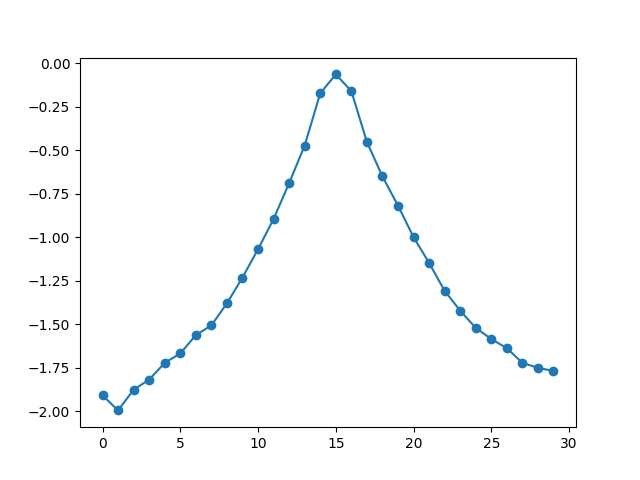

In [5]:
%matplotlib notebook
data = compute_avg_overlap(new_ovlp)
plt.plot(data, 'o-')
plt.show()

In [6]:
W_list = [0.0001, 0.33, 0.66, 1, 1.33, 1.66, 2, 2.33, 2.66, 3, 3.33, 3.66, 4, 4.33, 4.66, 5, 6, 7, 8, 9, 10]
e = 0.5

<ipython-input-3-1b892903cbe0>:49: RuntimeWarning: divide by zero encountered in log10
  data.append(np.mean(np.log10(overlap_data[site])))


<IPython.core.display.Javascript object>


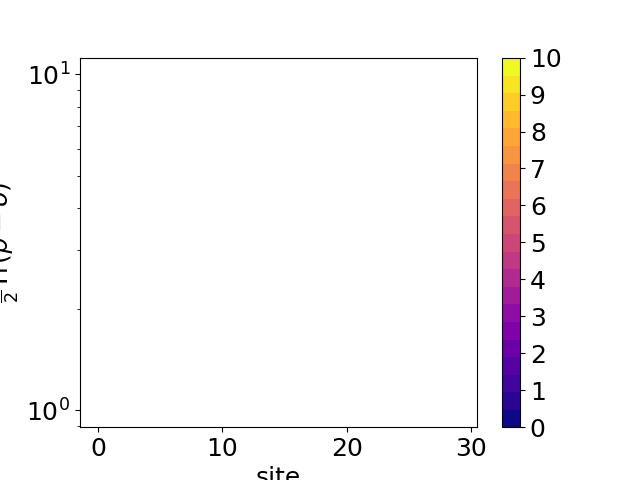

In [7]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
cmap = plt.get_cmap("plasma",len(W_list))
for W_idx, W in enumerate(W_list):
    overlap_data, energy_data = load_file(W, 0.5, energies_dict)
    new_ovlp, new_engy = filter_data(overlap_data, energy_data, 0.5)
    data = compute_avg_overlap(new_ovlp)
    plt.semilogy(data, 'o-', label="W = {}".format(W),color= cmap(W_idx))
plt.xlabel(r"site")
plt.ylabel(r"$\frac{1}{2}$Tr$\left(\rho - \sigma\right)$")
#plt.legend(loc='best')
norm = plt.Normalize(0,10)
sm = plt.cm.ScalarMappable(norm=norm,cmap=cmap)
sm.set_array(W_list)
plt.colorbar(sm, ticks=range(0,11))
plt.show()

In [8]:
def get_r_data(data):
    L = len(data)
    r_list = []
    for i in range(L//2):
        r = .5*(data[L//2-i] + data[L//2+i])
        r_list.append(r)
    return r_list

<ipython-input-3-1b892903cbe0>:49: RuntimeWarning: divide by zero encountered in log10
  data.append(np.mean(np.log10(overlap_data[site])))


<IPython.core.display.Javascript object>


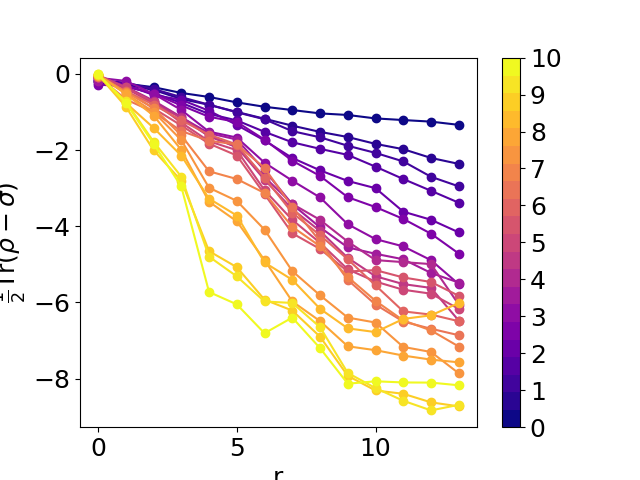

In [9]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
cmap = plt.get_cmap("plasma",len(W_list))
for W_idx, W in enumerate(W_list):
    overlap_data, energy_data = load_file(W, 0.5, energies_dict)
    new_ovlp, new_engy = filter_data(overlap_data, energy_data, 0.8)
    data = compute_avg_overlap(new_ovlp)
    r_list = get_r_data(data)
    plt.plot(r_list, 'o-', label="W = {}".format(W),color= cmap(W_idx))
plt.xlabel(r"r")
plt.ylabel(r"$\frac{1}{2}$Tr$\left(\rho - \sigma\right)$")
#plt.legend(loc='best')
norm = plt.Normalize(0,10)
sm = plt.cm.ScalarMappable(norm=norm,cmap=cmap)
sm.set_array(W_list)
plt.colorbar(sm, ticks=range(0,11))
plt.show()

<IPython.core.display.Javascript object>


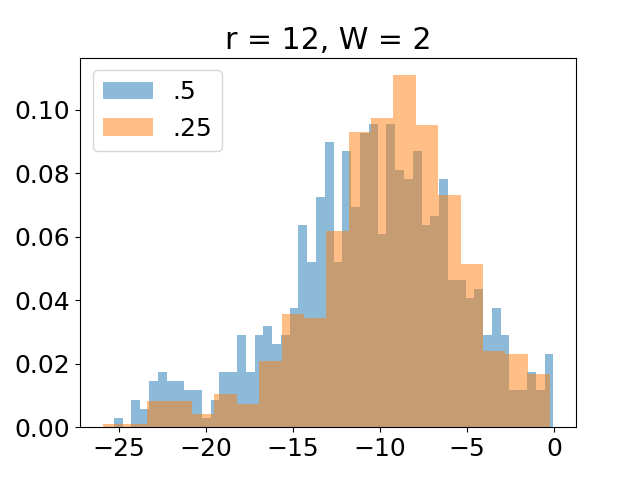

In [34]:
%matplotlib notebook
site = 12
L=32
W = 2
overlap_data, energy_data = load_file(W, 0.5, energies_dict)
new_ovlp, new_engy = filter_data(overlap_data, energy_data, 0.5)
h1 = new_ovlp[L//2 - site]
h2 = new_ovlp[L//2 + site]
h = np.log(np.append(h1, h2))
plt.hist(h, bins=50, density = True, alpha=.5, label='.5')

overlap_data, energy_data = load_file(W, 0.25, energies_dict)
new_ovlp, new_engy = filter_data(overlap_data, energy_data, 0.25)
h1 = new_ovlp[L//2 - site]
h2 = new_ovlp[L//2 + site]
h = np.log(np.append(h1, h2))
plt.hist(h, bins=20, density=True, alpha = .5, label='.25')

plt.title("r = {}, W = {}".format(site, W))
#plt.xlim(-20, 0)
plt.legend(loc='best')
plt.show()

<ipython-input-3-1b892903cbe0>:49: RuntimeWarning: divide by zero encountered in log10
  data.append(np.mean(np.log10(overlap_data[site])))


<IPython.core.display.Javascript object>


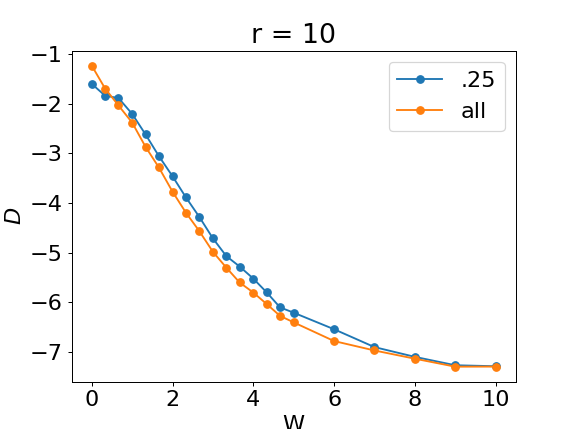

In [40]:
%matplotlib notebook
site = 10
zero_list = [0]*len(W_list)
zero_list2 = [0]*len(W_list)
for W_idx, W in enumerate(W_list):
    overlap_data, energy_data = load_file(W, 0.5, energies_dict)
    new_ovlp, new_engy = filter_data(overlap_data, energy_data, 0.5, tol=.05)
    data = compute_avg_overlap(new_ovlp)
    r_list = get_r_data(data)
    zero_list[W_idx] = r_list[site]
    
    overlap_data, energy_data = load_file(W, 0.5, energies_dict)
    new_ovlp, new_engy = filter_data(overlap_data, energy_data, 0.5, tol=.5)
    data = compute_avg_overlap(new_ovlp)
    r_list = get_r_data(data)
    zero_list2[W_idx] = r_list[site]
    
plt.plot(W_list, zero_list, 'o-', label='.25')
plt.plot(W_list, zero_list2, 'o-', label='all')

plt.title("r = {}".format(site))
plt.xlabel(r"W")
plt.ylabel(r"$D$")
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


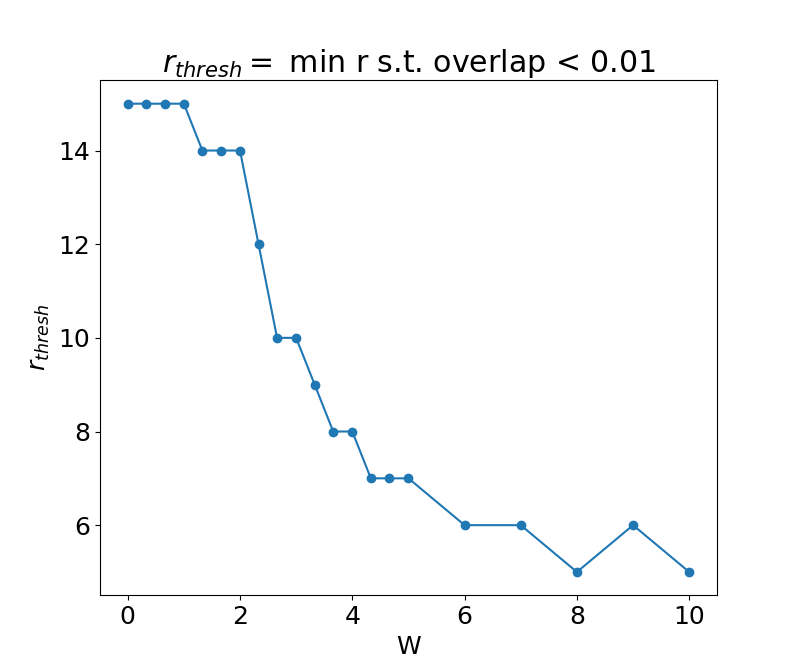

In [22]:
%matplotlib notebook
zero_list = [15]*len(W_list)
thresh = 0.01
for W_idx, W in enumerate(W_list):
    overlap_data, energy_data = load_file(W, 0.5, energies_dict)
    new_ovlp, new_engy = filter_data(overlap_data, energy_data, 0.5)
    data = compute_avg_overlap(new_ovlp)
    r_list = get_r_data(data)
    for i in range(len(r_list)):
        if r_list[i] < thresh:
            zero_list[W_idx] = i
            break
plt.plot(W_list, zero_list, 'o-')
plt.title(r"$r_{thresh} = $ min r s.t. overlap < "+str(thresh))
plt.xlabel(r"W")
plt.ylabel(r"$r_{thresh}$")
plt.show()

<IPython.core.display.Javascript object>


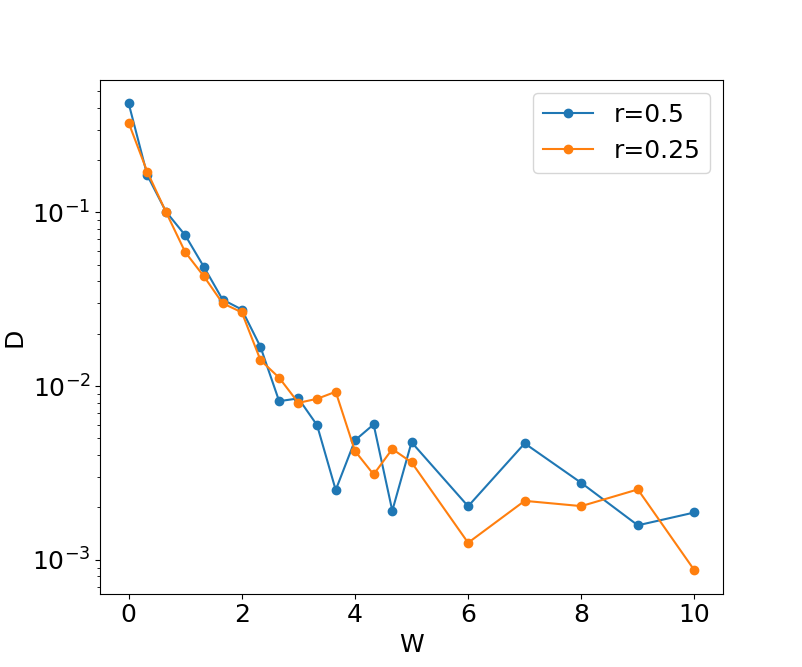

In [13]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
cmap = plt.get_cmap("plasma",len(W_list))
tr_list = []
for W_idx, W in enumerate(W_list):
    overlap_data, energy_data = load_file(W, 0.5, energies_dict)
    new_ovlp, new_engy = filter_data(overlap_data, energy_data, 0.5)
    data = compute_avg_overlap(new_ovlp)
    r_list = get_r_data(data)
    tr_list.append(r_list[-6])
plt.semilogy(W_list, tr_list, 'o-', label='r=0.5')
tr_list = []
for W_idx, W in enumerate(W_list):
    overlap_data, energy_data = load_file(W, 0.25, energies_dict)
    new_ovlp, new_engy = filter_data(overlap_data, energy_data, 0.25)
    data = compute_avg_overlap(new_ovlp)
    r_list = get_r_data(data)
    tr_list.append(r_list[-6])
plt.semilogy(W_list, tr_list, 'o-', label='r=0.25')
plt.legend(loc='best')
plt.xlabel("W")
plt.ylabel("D")
plt.show()

In [18]:
def get_slope(r_list, n=6):
    x = range(3,n)
    y = np.log10(r_list[3:n])
    m, b = np.polyfit(x, y, 1)
    return m

<ipython-input-49-1b892903cbe0>:49: RuntimeWarning: divide by zero encountered in log10
  data.append(np.mean(np.log10(overlap_data[site])))
<ipython-input-18-c35c21a7ab22>:3: RuntimeWarning: invalid value encountered in log10
  y = np.log10(r_list[3:n])


<IPython.core.display.Javascript object>


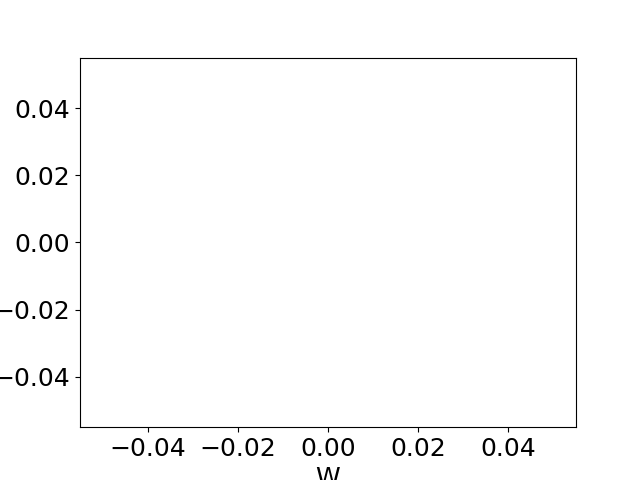

In [53]:
%matplotlib notebook
m_list = []
for W_idx, W in enumerate(W_list):
    overlap_data, energy_data = load_file(W, 0.5, energies_dict)
    new_ovlp, new_engy = filter_data(overlap_data, energy_data, 0.5)
    data = compute_avg_overlap(new_ovlp)
    r_list = get_r_data(data)
    m = get_slope(r_list, 7)
    m_list.append(m)
plt.plot(W_list, m_list, 'o-')
plt.xlabel("W")
plt.ylabel("m")
plt.show()